In [7]:
import statsmodels.api as sm
import matplotlib
import pandas as pd
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
df = pd.read_excel('Sample - Superstore.xls')

In [8]:
df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [10]:
df['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [11]:
Office_Supplies  = df.loc[df['Category']== 'Office Supplies']

In [12]:
Office_Supplies.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2,0.0,6.8714
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.368,2,0.2,2.5164


In [13]:
Office_Supplies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6026 entries, 2 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         6026 non-null   int64         
 1   Order ID       6026 non-null   object        
 2   Order Date     6026 non-null   datetime64[ns]
 3   Ship Date      6026 non-null   datetime64[ns]
 4   Ship Mode      6026 non-null   object        
 5   Customer ID    6026 non-null   object        
 6   Customer Name  6026 non-null   object        
 7   Segment        6026 non-null   object        
 8   Country        6026 non-null   object        
 9   City           6026 non-null   object        
 10  State          6026 non-null   object        
 11  Postal Code    6026 non-null   int64         
 12  Region         6026 non-null   object        
 13  Product ID     6026 non-null   object        
 14  Category       6026 non-null   object        
 15  Sub-Category   6026 n

In [14]:
Office_Supplies['Sub-Category'].unique()

array(['Labels', 'Storage', 'Art', 'Binders', 'Appliances', 'Paper',
       'Envelopes', 'Fasteners', 'Supplies'], dtype=object)

In [15]:
Office_Supplies['Order Date'].min(),Office_Supplies['Order Date'].max()

(Timestamp('2014-01-03 00:00:00'), Timestamp('2017-12-30 00:00:00'))

In [16]:
cols = ['Row ID','Order ID',
          'Order Date',     
          'Ship Date',      
          'Ship Mode',      
          'Customer ID',    
          'Customer Name',  
          'Segment',        
          'Country',        
          'City',           
          'State',          
          'Postal Code',    
          'Region',         
          'Product ID',     
          'Category',       
          'Sub-Category',   
          'Product Name',   
          'Sales',          
          'Quantity',       
          'Discount',       
          'Profit']

In [17]:
Office_Supplies[Office_Supplies['Sales']==Office_Supplies['Sales'].min()]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
4101,4102,US-2017-102288,2017-06-19,2017-06-23,Standard Class,ZC-21910,Zuschuss Carroll,Consumer,United States,Houston,...,77095,Central,OFF-AP-10002906,Office Supplies,Appliances,Hoover Replacement Belt for Commercial Guardsm...,0.444,1,0.8,-1.11


In [18]:
Office_Supplies[Office_Supplies['Sales']==Office_Supplies['Sales'].max()]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
9039,9040,CA-2016-117121,2016-12-17,2016-12-21,Standard Class,AB-10105,Adrian Barton,Consumer,United States,Detroit,...,48205,Central,OFF-BI-10000545,Office Supplies,Binders,GBC Ibimaster 500 Manual ProClick Binding System,9892.74,13,0.0,4946.37


In [19]:
cols

['Row ID',
 'Order ID',
 'Order Date',
 'Ship Date',
 'Ship Mode',
 'Customer ID',
 'Customer Name',
 'Segment',
 'Country',
 'City',
 'State',
 'Postal Code',
 'Region',
 'Product ID',
 'Category',
 'Sub-Category',
 'Product Name',
 'Sales',
 'Quantity',
 'Discount',
 'Profit']

In [20]:
Office_Supplies = Office_Supplies.sort_values('Order Date')

In [21]:
Office_Supplies

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
7980,7981,CA-2014-103800,2014-01-03,2014-01-07,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,...,77095,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512
740,741,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,3,0.2,-64.7748
739,740,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,3,0.2,4.2717
741,742,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,2,0.8,-5.4870
1759,1760,CA-2014-141817,2014-01-05,2014-01-12,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,...,19143,East,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,3,0.2,4.8840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5091,5092,CA-2017-156720,2017-12-30,2018-01-03,Standard Class,JM-15580,Jill Matthias,Consumer,United States,Loveland,...,80538,West,OFF-FA-10003472,Office Supplies,Fasteners,Bagged Rubber Bands,3.024,3,0.2,-0.6048
1297,1298,CA-2017-115427,2017-12-30,2018-01-03,Standard Class,EB-13975,Erica Bern,Corporate,United States,Fairfield,...,94533,West,OFF-BI-10004632,Office Supplies,Binders,GBC Binding covers,20.720,2,0.2,6.4750
908,909,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,...,10009,East,OFF-BI-10003684,Office Supplies,Binders,Wilson Jones Legal Size Ring Binders,52.776,3,0.2,19.7910
1296,1297,CA-2017-115427,2017-12-30,2018-01-03,Standard Class,EB-13975,Erica Bern,Corporate,United States,Fairfield,...,94533,West,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188


In [22]:
Office_Supplies.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [23]:
Office_Supplies.groupby('Order Date')['Sales'].sum().reset_index()

,Order Date,Sales
0,2014-01-03,16.448
1,2014-01-04,288.060
2,2014-01-05,19.536
3,2014-01-06,685.340
4,2014-01-07,10.430
...,...,...
1143,2017-12-26,814.594
1144,2017-12-27,13.248
1145,2017-12-28,1091.244
1146,2017-12-29,282.440


In [24]:
Office_Supplies = Office_Supplies.set_index('Order Date')

In [25]:
y = Office_Supplies['Sales'].resample('MS').mean()
print(y['2017':])

Order Date
2017-01-01    212.742890
2017-02-01    125.555458
2017-03-01    100.346800
2017-04-01    113.324744
2017-05-01     94.088795
2017-06-01    113.503617
2017-07-01     81.931744
2017-08-01    210.208755
2017-09-01    112.309306
2017-10-01    135.512894
2017-11-01    117.873921
2017-12-01    108.316520
Freq: MS, Name: Sales, dtype: float64


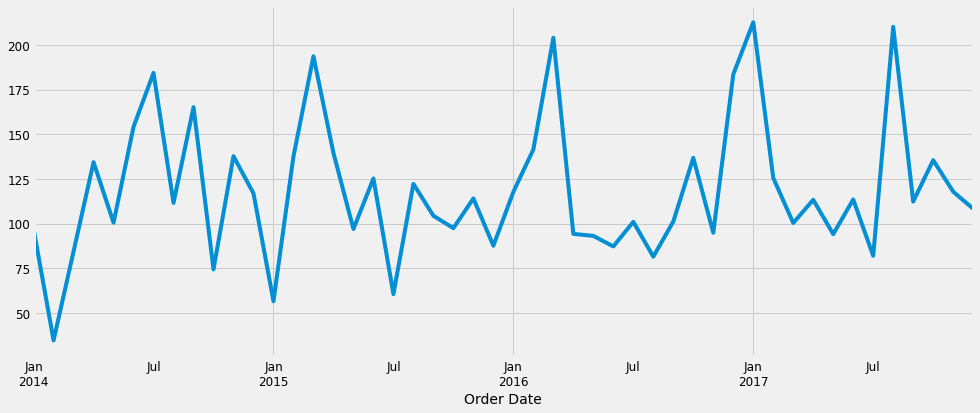

In [26]:
y.plot(figsize=(15,6))
plt.show()

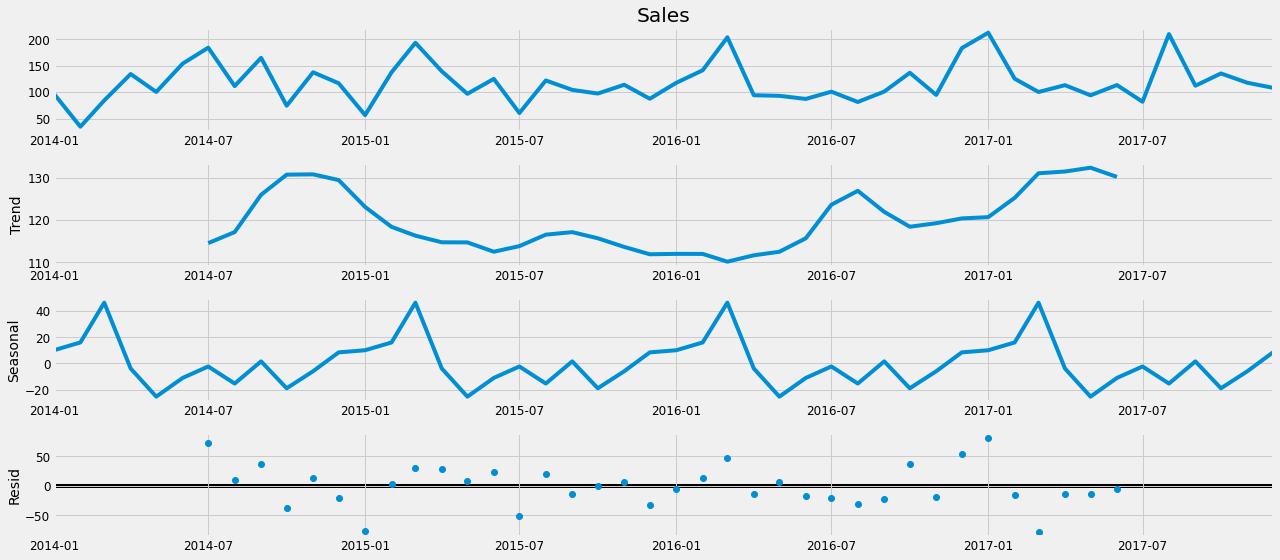

In [27]:
from pylab import rcParams
rcParams['figure.figsize'] = 18,8
decomposition = sm.tsa.seasonal_decompose(y,model= 'addictive')
fig = decomposition.plot()
plt.show()

In [28]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12)
                for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA....')
print('SARIMAX : {} x {}'. format(pdq[1], seasonal_pdq[1]))
print('SARIMAX : {} x {}'. format(pdq[1], seasonal_pdq[2]))
print('SARIMAX : {} x {}'. format(pdq[2], seasonal_pdq[3]))
print('SARIMAX : {} x {}'. format(pdq[2], seasonal_pdq[4]))


Examples of parameter combinations for Seasonal ARIMA....
SARIMAX : (0, 0, 1) x (0, 0, 1, 12)
SARIMAX : (0, 0, 1) x (0, 1, 0, 12)
SARIMAX : (0, 1, 0) x (0, 1, 1, 12)
SARIMAX : (0, 1, 0) x (1, 0, 0, 12)


In [29]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationary=False,
                                            enforce_invertibility=False)
            result = mod.fit()
            print('ARIMA {} x{} 23 -ARC:{}'.format(param,
                param_seasonal, result.aic))
        except:
            continue

ARIMA (0, 0, 0) x(0, 0, 0, 12) 23 -ARC:601.597692698065
ARIMA (0, 0, 0) x(0, 0, 1, 12) 23 -ARC:2227.9248104693784
ARIMA (0, 0, 0) x(0, 1, 0, 12) 23 -ARC:393.83019151233873
ARIMA (0, 0, 0) x(0, 1, 1, 12) 23 -ARC:392.6350209282726
ARIMA (0, 0, 0) x(1, 0, 0, 12) 23 -ARC:544.5017165507819
ARIMA (0, 0, 0) x(1, 0, 1, 12) 23 -ARC:1902.7107212291553
ARIMA (0, 0, 0) x(1, 1, 0, 12) 23 -ARC:394.05202845992704
ARIMA (0, 0, 0) x(1, 1, 1, 12) 23 -ARC:394.189338445921
ARIMA (0, 0, 1) x(0, 0, 0, 12) 23 -ARC:568.3954062697054
ARIMA (0, 0, 1) x(0, 0, 1, 12) 23 -ARC:1966.140977535998
ARIMA (0, 0, 1) x(0, 1, 0, 12) 23 -ARC:395.76445453986713
ARIMA (0, 0, 1) x(0, 1, 1, 12) 23 -ARC:394.07711953404777
ARIMA (0, 0, 1) x(1, 0, 0, 12) 23 -ARC:542.0021909956658
ARIMA (0, 0, 1) x(1, 0, 1, 12) 23 -ARC:1973.5228352728677
ARIMA (0, 0, 1) x(1, 1, 0, 12) 23 -ARC:395.4180342751486
ARIMA (0, 0, 1) x(1, 1, 1, 12) 23 -ARC:395.84609816613164
ARIMA (0, 1, 0) x(0, 0, 0, 12) 23 -ARC:507.9787709375091
ARIMA (0, 1, 0) x(0, 0, 1

In [30]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order = (1,1,1),
                                seasonal_order = (1,1,0,12),
                                enforce_stationary = False,
                                enforce_invertibility = False)
mod.fit()


In [31]:
results = mod.fit()
print(results.summary().tables[1])


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1504      0.232      0.647      0.517      -0.305       0.606
ma.L1         -1.0000      0.318     -3.143      0.002      -1.624      -0.376
ar.S.L12      -0.3392      0.272     -1.249      0.212      -0.871       0.193
sigma2      2874.4644      0.000    2.6e+07      0.000    2874.464    2874.465


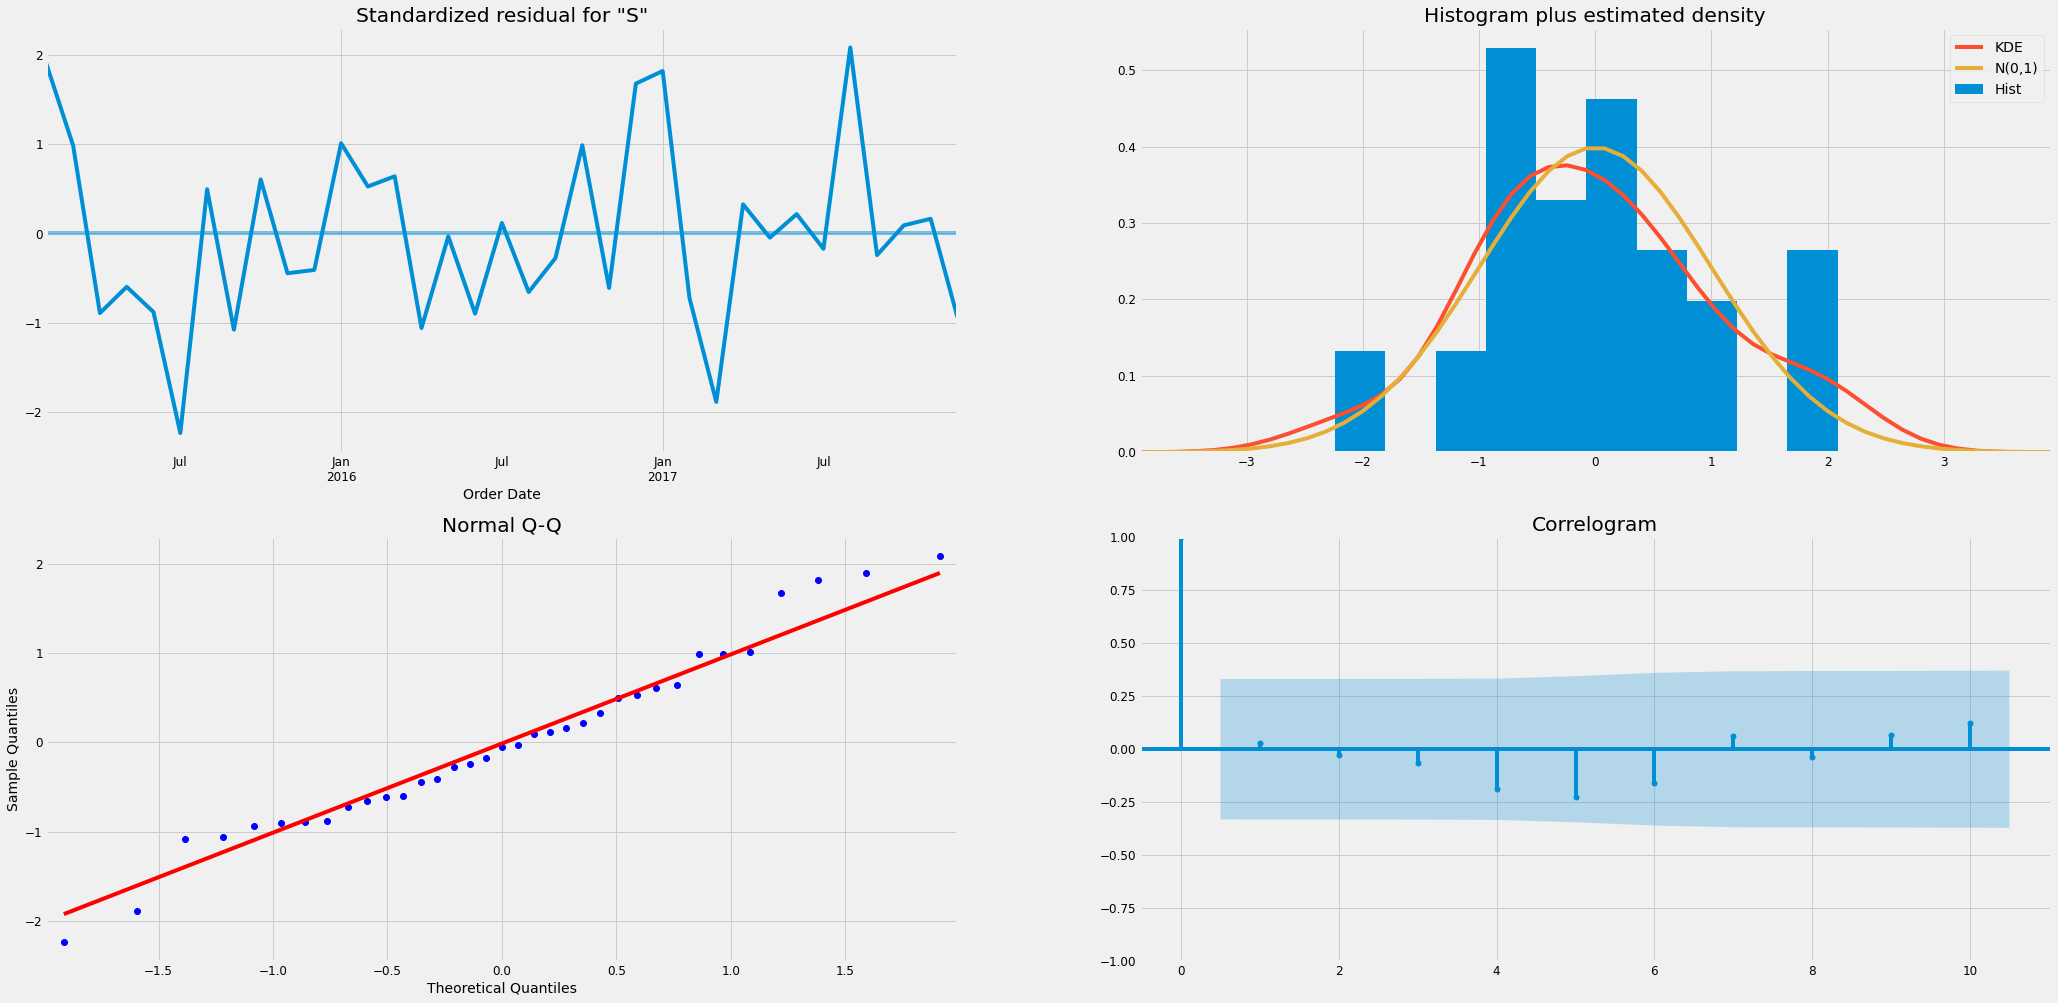

In [32]:
results.plot_diagnostics(figsize=(32,16))
plt.show()

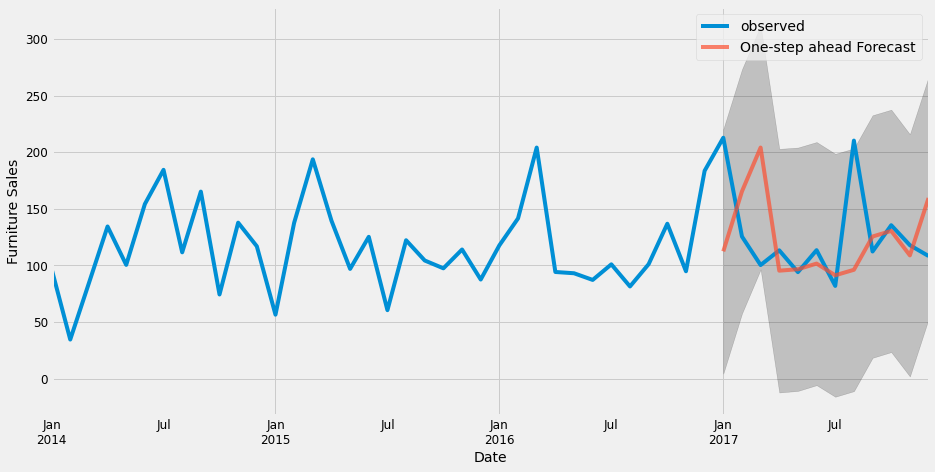

In [33]:
pred = results.get_prediction(
    start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast',
                         alpha=.7,
                         figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:,0],
                pred_ci.iloc[:,1],
                color = 'k',
                alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()


In [34]:
y_forecasted = pred.predicted_mean
y_truth =  y['2017-01-01':]
mse = ((y_forecasted - y_truth)** 2).mean()
print('The Mean Square Error of the Forecast is {}'.format(round(mse,2)))
print('The Root Mean Square Error of our forecast is {}'.format(round(np.sqrt(mse),2)))

The Mean Square Error of the Forecast is 3239.23
The Root Mean Square Error of our forecast is 56.91


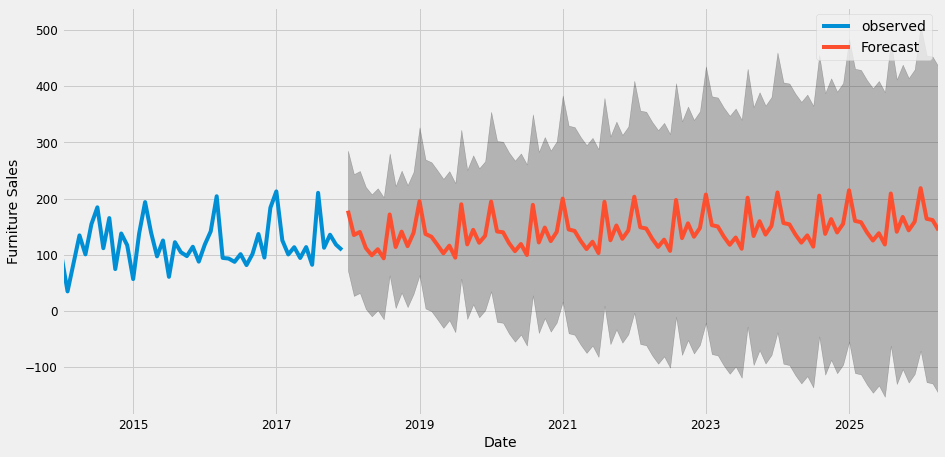

In [35]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1],
                color='k',
                alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()


In [37]:
#comparing the model with other categories
office = df.loc[df['Category'] == 'Office Supplies']
furniture = df.loc[df['Category'] == 'Furniture']
furniture.shape, office.shape
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID',
        'Customer Name', 'Segment', 'Country', 'City', 'State', 
        'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
        'Product Name', 'Quantity', 'Discount', 'Profit']
furniture.drop(cols,axis=1,inplace=True)
office.drop(cols,axis=1,inplace=True)
furniture = furniture.sort_values('Order Date')
office = office.sort_values('Order Date')
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()
office =office.groupby('Order Date')['Sales'].sum().reset_index()
furniture = furniture.set_index('Order Date')
office = office.set_index('Order Date')

In [38]:
office.head(5)

,Sales
Order Date,
2014-01-03,16.448
2014-01-04,288.060
2014-01-05,19.536
2014-01-06,685.340
2014-01-07,10.430


In [39]:
furniture.head(5)

,Sales
Order Date,
2014-01-06,2573.820
2014-01-07,76.728
2014-01-10,51.940
2014-01-11,9.940
2014-01-13,879.939


In [40]:
y_furniture = furniture['Sales'].resample('MS').mean()
y_office = office['Sales'].resample('MS').mean()
furniture = pd.DataFrame({'Order Date': y_furniture.index,
                          'Sales': y_furniture.values})
office = pd.DataFrame({'Order Date': y_office.index,
                       'Sales': y_office.values})
store = furniture.merge(office, how = 'inner',on='Order Date')
store.rename(columns = {'Sales_x':'furniture_sales','Sale_y':'office_sales'},inplace = True)
store.head()

,Order Date,furniture_sales,Sales_y
0,2014-01-01,480.194231,285.357647
1,2014-02-01,367.931600,63.042588
2,2014-03-01,857.291529,391.176318
3,2014-04-01,567.488357,464.794750
4,2014-05-01,432.049188,324.346545


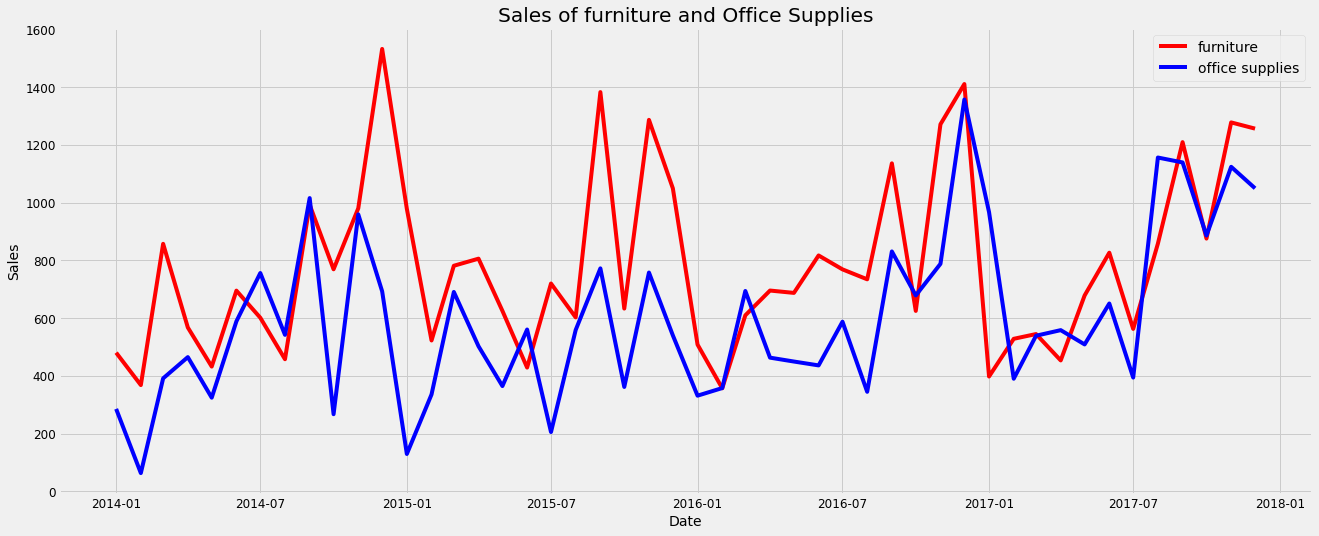

In [42]:
plt.figure(figsize=(20,8))
plt.plot(store['Order Date'],store['furniture_sales'],'r-',label = 'furniture')
plt.plot(store['Order Date'], store['Sales_y'],'b-', label='office supplies')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales of furniture and Office Supplies')
plt.legend()